# Machine Learning Models

## Imports

In [1]:
import sys
sys.path.append('..')

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from PIL import Image
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Import ML utility functions
from src.ml_model_utils import *

import os
csv_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset'))

train_paths_csv = os.path.join(csv_dir, 'balanced_train_paths.csv')
test_paths_csv = os.path.join(csv_dir, 'balanced_test_paths.csv')

train_csv = os.path.join(csv_dir, 'balanced_train.csv')
test_csv = os.path.join(csv_dir, 'balanced_test.csv')

In [2]:
balanced_train_image_paths = pd.read_csv(train_paths_csv)['image_path'].tolist()
balanced_test_image_paths = pd.read_csv(test_paths_csv)['image_path'].tolist()

In [3]:
balanced_train_image = pd.read_csv(train_csv)
balanced_test_image = pd.read_csv(test_csv)

## Feature Extraction

#### Using model VGG16 without the classification layers

**VGG16** is a convolutional neural network (CNN) architecture developed by the Visual Geometry Group at the University of Oxford. It’s known for its deep yet simple architecture made up of 13 convolutional layers and 3 fully connected (FC) layers. Instead of training a model from scratch, we can use pretrained models like VGG16, which have already learned to detect low-level and mid-level features (like edges, textures, shapes) from large datasets like ImageNet. 

For this case, we removed the top layers (classification layers) and keep only the convolutional base.

**- Benefits**
- Faster training — no need to learn low-level features from scratch.
- High accuracy even with small datasets.
- Useful as a first step before trying more complex deep learning models.

In [4]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [5]:
# Feature Extraction
X = extract_features(balanced_train_image_paths, vgg_model)

y = balanced_train_image["Emotion"]

## SVM (SVC) model

The **SVC (Support Vector Classification)** class from `sklearn.svm` is a popular supervised learning model used for classification tasks. It's based on the Support Vector Machine (SVM) algorithm, which is especially effective for high-dimensional spaces like image feature vectors extracted from models like VGG16. The main idea is that SVC finds the hyperplane that best separates the classes in the feature space. It maximizes the margin between the closest points of different classes, called support vectors.

In [6]:
clf, y_pred, y_val = train_and_evaluate_svm(X, y)

Classification Report:

              precision    recall  f1-score   support

       angry       0.26      0.21      0.23        87
     disgust       0.62      0.66      0.64        87
        fear       0.35      0.21      0.26        87
       happy       0.58      0.49      0.53        88
     neutral       0.51      0.59      0.55        87
         sad       0.35      0.55      0.43        87
    surprise       0.66      0.66      0.66        88

    accuracy                           0.48       611
   macro avg       0.48      0.48      0.47       611
weighted avg       0.48      0.48      0.47       611



Accuracy: 0.4795417348608838
Classification Report:
               precision    recall  f1-score     support
angry          0.264706  0.206897  0.232258   87.000000
disgust        0.619565  0.655172  0.636872   87.000000
fear           0.352941  0.206897  0.260870   87.000000
happy          0.581081  0.488636  0.530864   88.000000
neutral        0.510000  0.586207  0.545455   87.000000
sad            0.347826  0.551724  0.426667   87.000000
surprise       0.659091  0.659091  0.659091   88.000000
accuracy       0.479542  0.479542  0.479542    0.479542
macro avg      0.476459  0.479232  0.470296  611.000000
weighted avg   0.476929  0.479542  0.470705  611.000000


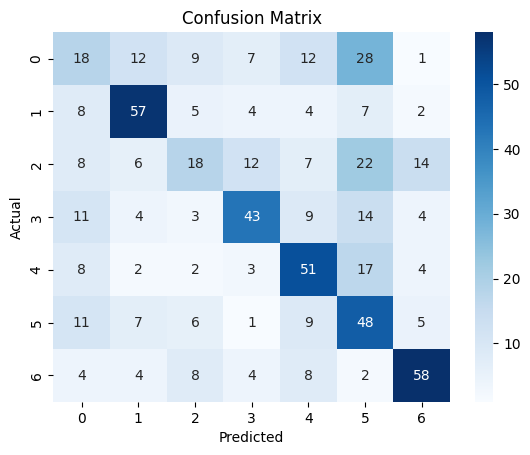

In [7]:
# Evaluate predictions
metrics_df = evaluate_classification_metrics(y_val, y_pred)
